In [1]:
include(joinpath("..","src","setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/davidlittle/.julia/packages/Compose/BYWXX/src/Compose.jl:161
┌ Warning: Package Compose does not have Cairo in its dependencies:
│ - If you have Compose checked out for development and have
│   added Cairo as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Compose
│ Loading Cairo into Compose from project dependency, future warnings for Compose are suppressed.
└ @ nothing nothing:840
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/davidlittle/.julia/packages/Gadfly/ew1SM/src/mapping.jl:228


1:900

In [ ]:
# TODO: use a multi-level model??

In [5]:
p = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])
run1 = bistable_model(p,joinpath("..","src","settings.toml"),intermediate_results=true);

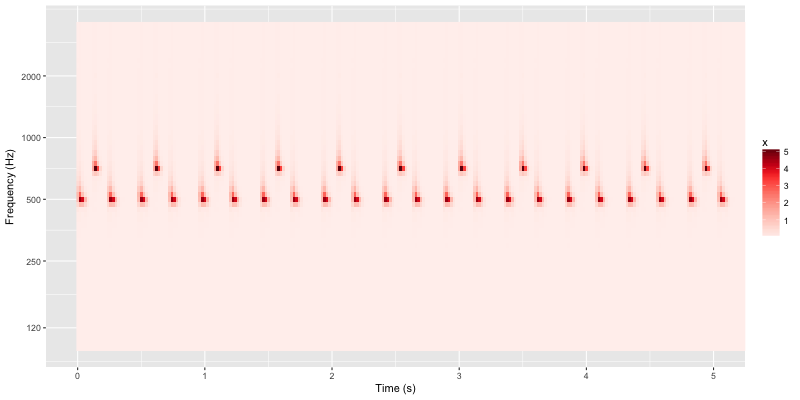

RObject{VecSxp}


In [16]:
rplot(run1.spect.result) + R"coord_cartesian(xlim=c(0,5))"

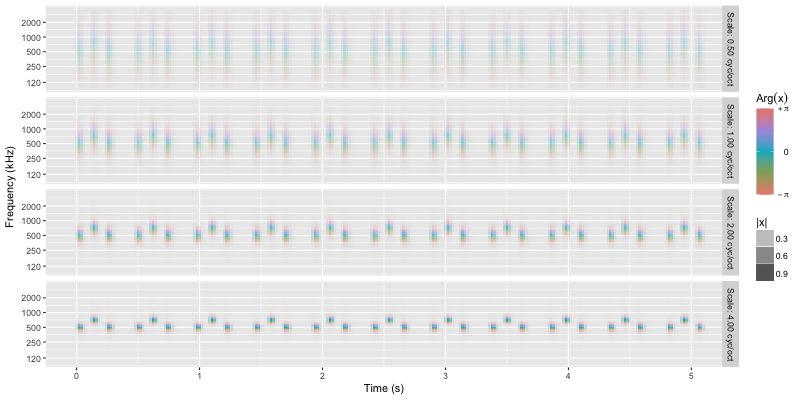

RObject{VecSxp}


In [17]:
rplot(run1.cortical.result) + R"coord_cartesian(xlim=c(0,5))"

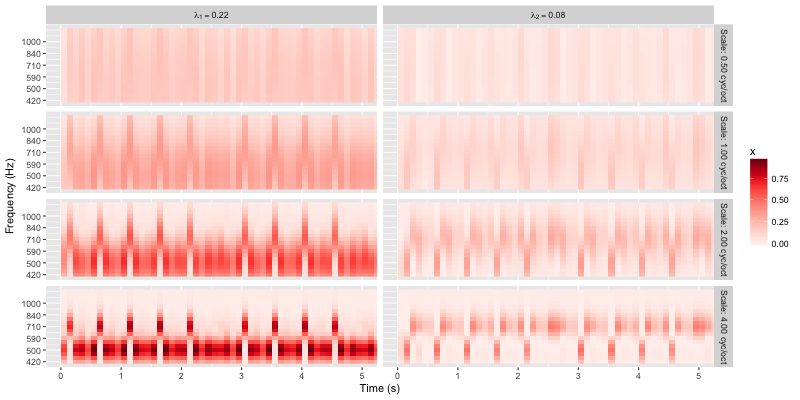

RObject{VecSxp}


In [18]:
rplot(run1.cohere) + R"coord_cartesian(xlim=c(0,5))"

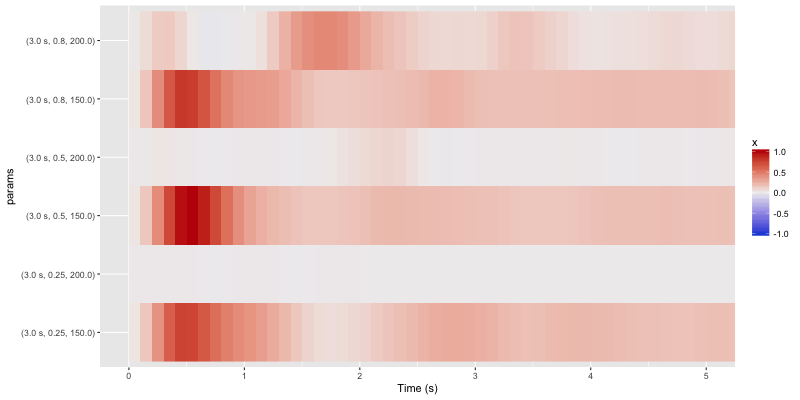

RObject{VecSxp}


In [23]:
rplot(run1.sources.outweights) + R"coord_cartesian(xlim=c(0,5))"

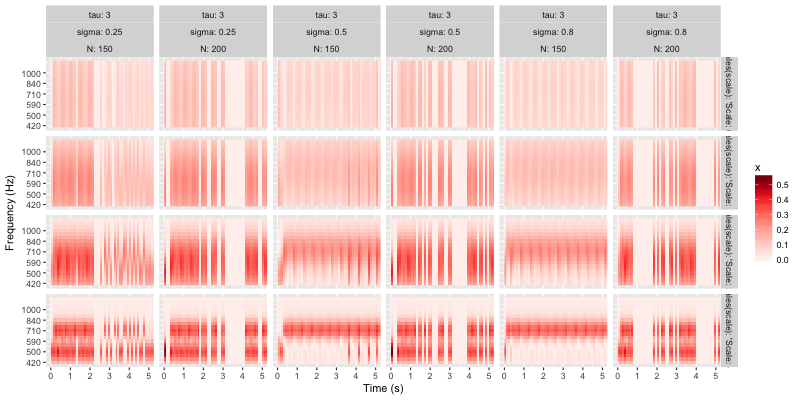

RObject{VecSxp}


In [20]:
rplot(run1.sources.tracks) + R"coord_cartesian(xlim=c(0,5))"

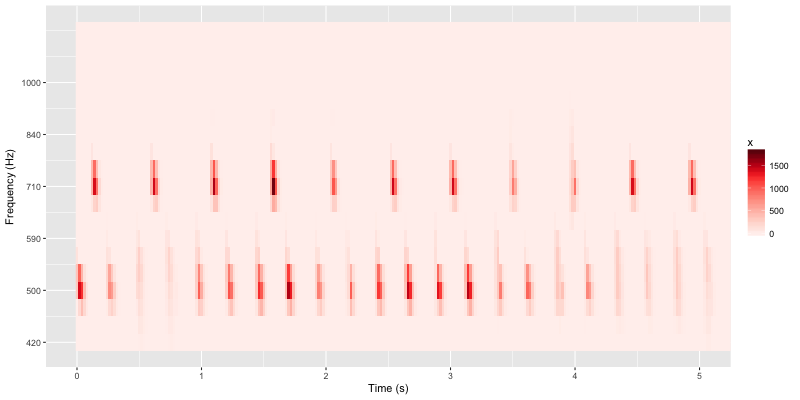

RObject{VecSxp}


In [21]:
rplot(run1.primary_source) + R"coord_cartesian(xlim=c(0,5))"

In [25]:
datadir_selected = joinpath("..","data","count_lengths","run_2018-11-30")

"../data/count_lengths/run_2018-11-30"

In [26]:
params_selected = load_params(joinpath(datadir_selected,"params.jld2"))
params_selected[:pindex] = 1:size(params_selected,1)
settings = joinpath(srcdir,"settings.toml")

results = []
for_results_in(joinpath(datadir_selected,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df_selected = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:20


In [27]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ]
progress = Progress(nrow(unique(params_selected[fields])))
df_summary_selected = by(params_selected,fields) do row
    next!(progress)
    m = model_error(df_selected,params_selected;(k => row[1,k] for k in fields)...)
    DataFrame(eratio = error_ratio(m),pindex = row.pindex[1])
end

Progress:  87%|████████████████████████████████████     |  ETA: 0:00:02┌ Warning: Expected 3 parameter entries. 
│   
Instead, only found entires:  = 
Instead, only found entires: 
│   string(found) = 2×36 DataFrame
│ Row │ f_W_m_σ │ f_c_m   │ t_c_a   │ t_c_m   │ f         │ t_W_m_c │ t_c_x   │ f_c_x   │ t_W_m_σ_t │ s_τ_σ     │ f_c_a   │ f_c_σ   │ s_c_m   │ f_τ_a     │ s_c_σ   │ Δt        │ s_τ_m     │ s_c_x   │ t_W_m_σ_ϕ │ t_τ_a     │ s_c_a   │ t_τ_m     │ t_c_σ   │ t_τ_x     │ s_W_m_c │ s_τ_a     │ f_W_m_c │ t_τ_σ     │ f_τ_σ     │ f_τ_x     │ Δf    │ t_W_m_σ_N │ f_τ_m     │ s_τ_x     │ s_W_m_σ │ pindex │
│     │ Float64 │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Float64 │ Float64 │ Float64   │ Quantity… │ Float64 │ Float64 │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Float64 │ Float64   │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Float64 │ Quantity… │ Quantity… │ Quantity… │ Int64 │ Float64   │ Quantity… │ Quantity… │ Float

,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,eratio,pindex
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,5.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.615719,1
2,5.0,5.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,1.756,2
3,5.0,63.0,0.2,0.0,0.0,0.2,0.0,0.0,0.2,0.699746,3
4,5.0,0.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.70949,4
5,5.0,5.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,1.75,5
6,5.0,63.0,0.2,0.0,0.0,0.2,5.0,0.0,0.2,0.694976,6
7,5.0,0.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.69141,7
8,5.0,5.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,1.69953,8
9,5.0,63.0,0.2,0.0,0.0,0.2,63.0,0.0,0.2,0.676546,9


In [37]:
p = copy(params_selected[select_params(params_selected,f_c_a=5,f_c_m=63,s_c_a=63,s_c_m=63,t_c_a=790,t_c_m=10^4),:][1,:])

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t,s_τ_σ,f_c_a,f_c_σ,s_c_m,f_τ_a,s_c_σ,Δt,s_τ_m,s_c_x,t_W_m_σ_ϕ,t_τ_a,s_c_a,t_τ_m,t_c_σ,t_τ_x,s_W_m_c,s_τ_a,f_W_m_c,t_τ_σ,f_τ_σ,f_τ_x,Δf,t_W_m_σ_N,f_τ_m,s_τ_x,s_W_m_σ,pindex
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Quantity…,Float64,Quantity…,Quantity…,Float64,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Int64,Float64,Quantity…,Quantity…,Float64,Int64
1,5.6,63.0,790.0,10000.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,63.0,3 s,0.2,120 ms,350 ms,3.0,7.0,3 s,63.0,350 ms,0.2,500 ms,6.0,3 s,6.0,500 ms,500 ms,500 ms,3,3.0,350 ms,500 ms,15.0,1157


In [38]:
run1 = bistable_model(p,joinpath("..","src","settings.toml"),intermediate_results=true);

┌ Info: Stimulus is 47.999875 seconds long.
└ @ AuditoryBistabilityLE /Users/davidlittle/.julia/packages/AuditoryBistabilityLE/eT3qD/src/stim.jl:43


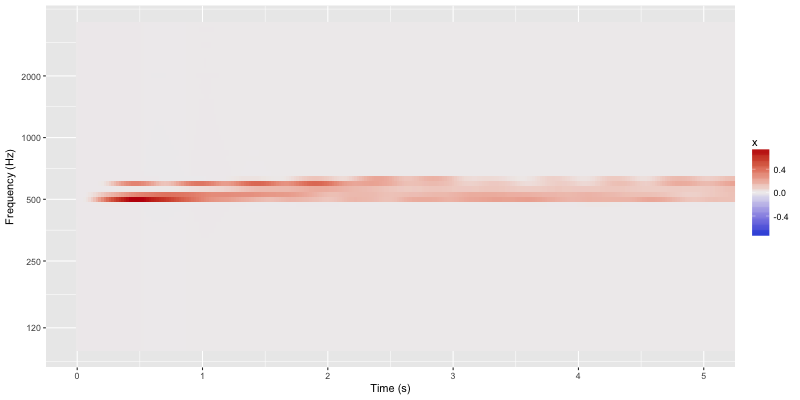

RObject{VecSxp}


In [41]:
rplot(run1.spect.outweights) + R"coord_cartesian(xlim=c(0,5))"

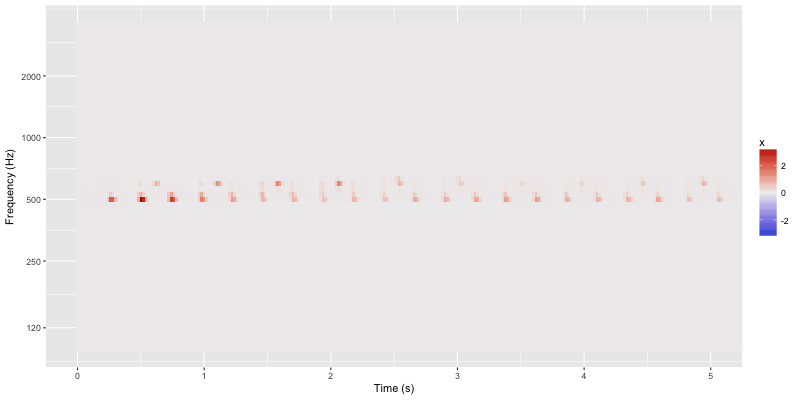

RObject{VecSxp}


In [45]:
result = similar(run1.input)
result .= Array(run1.spect.result).*Array(run1.input)

rplot(result) + R"coord_cartesian(xlim=c(0,5))"

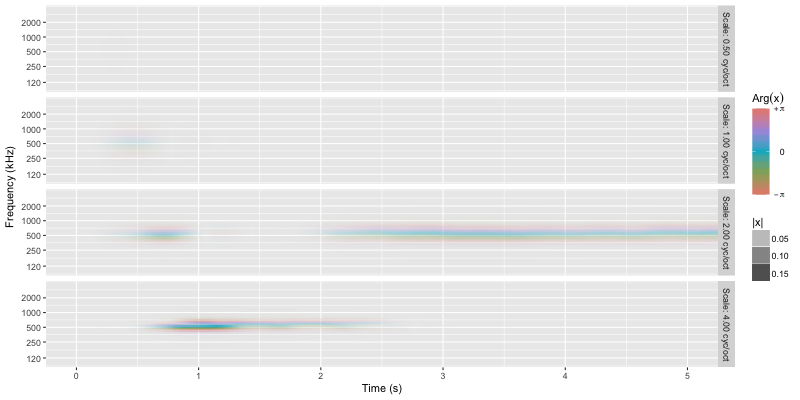

RObject{VecSxp}


In [46]:
rplot(run1.cortical.result) + R"coord_cartesian(xlim=c(0,5))"

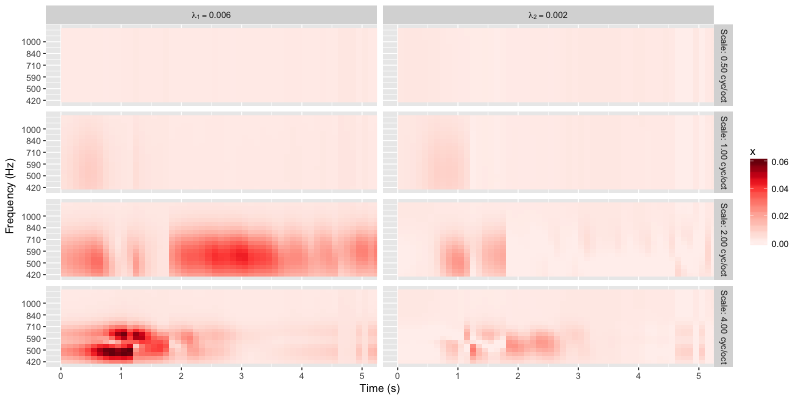

RObject{VecSxp}


In [47]:
rplot(run1.cohere) + R"coord_cartesian(xlim=c(0,5))"

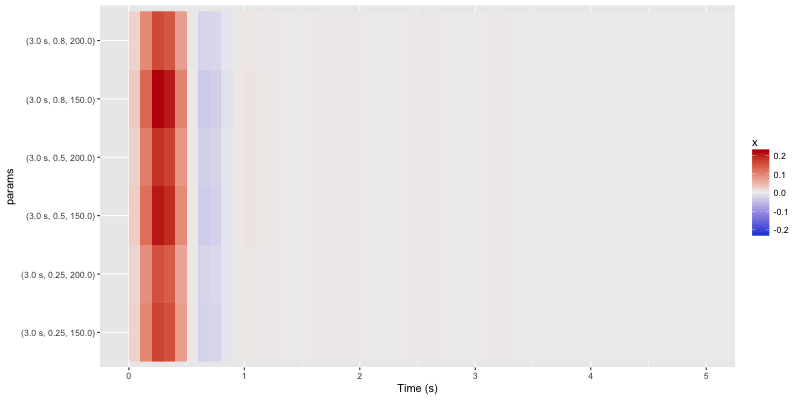

RObject{VecSxp}


In [48]:
rplot(run1.sources.outweights) + R"coord_cartesian(xlim=c(1,5))"

┌ Warning: RCall.jl: Scale for 'fill' is already present. Adding another scale for 'fill', which
│ will replace the existing scale.
└ @ RCall /Users/davidlittle/.julia/packages/RCall/Q4n8R/src/io.jl:110


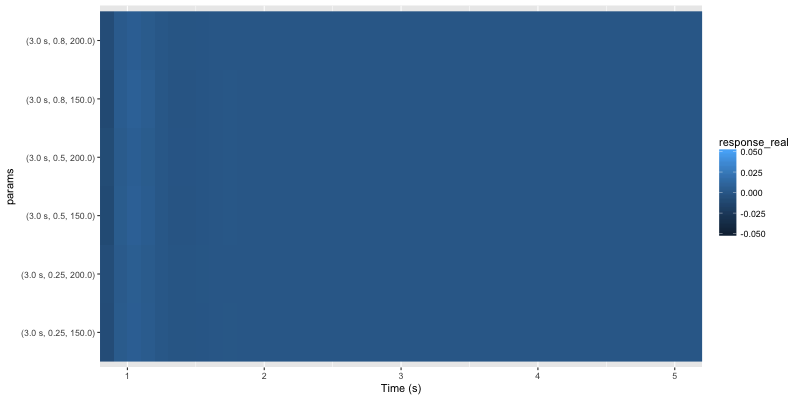

RObject{VecSxp}


In [56]:
rplot(run1.sources.outweights) + R"coord_cartesian(xlim=c(1,5))" + R"scale_fill_gradient(limits=c(-0.05,0.05))"

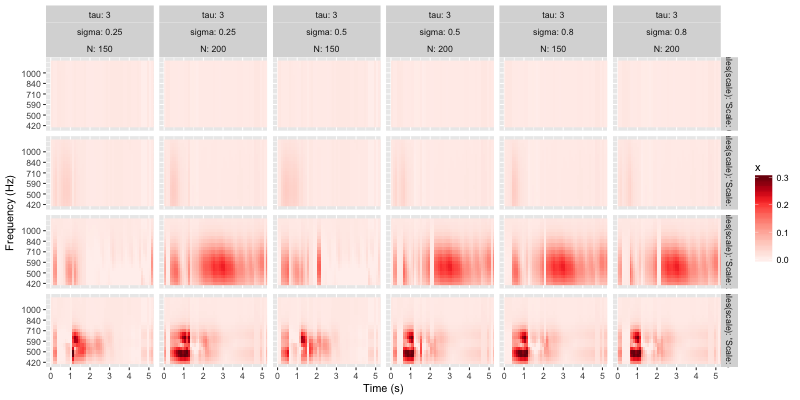

RObject{VecSxp}


In [49]:
rplot(run1.sources.tracks) + R"coord_cartesian(xlim=c(0,5))"

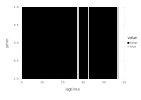

In [57]:
plot_lengths(run1.percepts.counts)

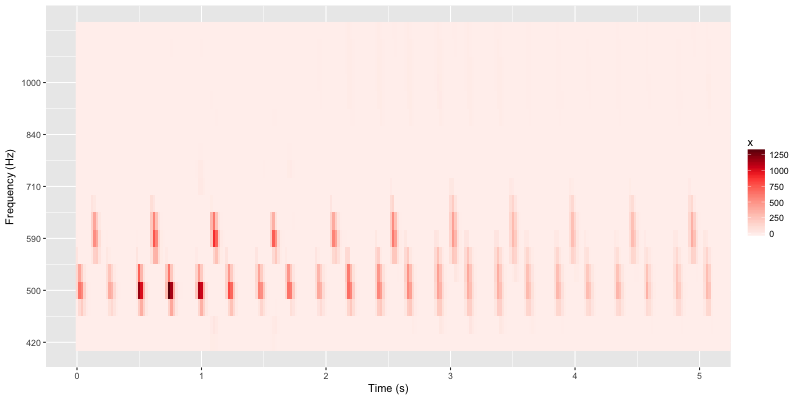

RObject{VecSxp}


In [50]:
rplot(run1.primary_source) + R"coord_cartesian(xlim=c(0,5))"